# Exam 28th of August 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using **rejection** sampling:

$$
    f[x] = C (\sin(x))^{10}
$$
for $0 \leq x \leq \pi$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one). Hint: you do not need to know the value of $C$ to perform rejection sampling.

2. [2p] Produce 10000 samples (**use fewer if it takes too long**) and put the answer in `problem1_samples` from the above distribution and plot the histogram. 
3. [2p] Define $X$ as a random variable with the density given in part 1. Denote $Y = \left ( X - \frac{\pi}{2} \right)^2$ and use the above 10000 samples to estimate
$$
    \mathbb{E}[Y]
$$
and store the result in `problem1_expectation`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

In [11]:
# Part 1

import math
import numpy as np

def problem1_rejection(n_samples=1000):
    """
    Generate samples from the given distribution using rejection sampling.

    Parameters:
    n_samples: int, number of samples to generate

    Returns:
    numpy array of samples
    """
    # Define target PDF (f(x))
    # 目标分布sin(x)^10最大值为 1（在 x = π/2 时达到最大）
    def target_pdf(x):
        return (math.sin(x) ** 10) if 0 <= x <= math.pi else 0

    # Define proposal PDF (g(x)) as a uniform distribution over [0, π]
    # 而候选分布 g(x) 必须覆盖目标分布的整个定义域 [0, π], 而不是[0, 1]。
    def proposal_pdf(x):
        return 1 if 0 <= x <= math.pi else 0

    # Define M (scaling constant)
    M = 1  # This works because f(x): sin(x)^10 ≤ Mg(x): 1 for all x in [0, π]

    samples = []
    count = 0  # For efficiency check

    while len(samples) < n_samples:
        # Generate candidate sample x from proposal distribution
        x = np.random.uniform(0, math.pi)  # Uniformly sample x in [0, π]

        # Generate a uniform random number for acceptance
        u = np.random.uniform(0, M * proposal_pdf(x))

        # Accept or reject the candidate
        if u <= target_pdf(x):
            samples.append(x)
        count += 1  # Count the total iterations

    print(f"Generated {n_samples} samples with {count} total iterations.")
    return np.array(samples)

Generated 10000 samples with 40687 total iterations.


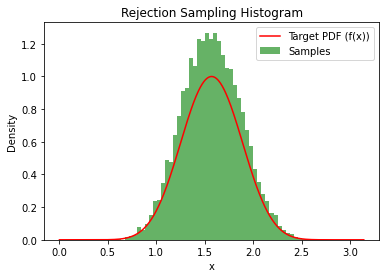

In [12]:
# Part 2

import matplotlib.pyplot as plt

# Generate 10,000 samples using rejection sampling
problem1_samples = problem1_rejection(n_samples=10000)

# Plot histogram of the samples
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='g', label="Samples")

# Overlay the target PDF for comparison
x = np.linspace(0, math.pi, 500)
y = [(math.sin(val) ** 10) for val in x]
plt.plot(x, y, 'r-', label="Target PDF (f(x))")

plt.title("Rejection Sampling Histogram")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

In [17]:
# Part 3

samples = np.array(problem1_samples)

# 定义 Y 的公式
Y = (samples - math.pi / 2) ** 2

# 计算期望 E[Y]
problem1_expectation = np.mean(Y)

print(f"E[Y]: {problem1_expectation}")


E[Y]: 0.09177918093220427


In [31]:
# Part 4
# 从之前的代码生成的 Y 样本（长度为 n）来计算一个 95% 的置信区间（confidence interval）

import numpy as np
import math

# 假设我们已经有 n 个样本的 Y 值
n = 10000  # 样本数量
Y_mean = problem1_expectation

# Y 的范围 [a, b]
a = 0  # 最小值发生在 X = π/2
b = (math.pi/2)**2  # 最大值发生在 X = 0 或 X = π

# Hoeffding's inequality 参数
delta = 0.05  # 1 - 置信水平
epsilon = math.sqrt(((b - a)**2 * math.log(2 / delta)) / (2 * n))

# 计算置信区间
problem1_interval = (Y_mean - epsilon, Y_mean + epsilon)

print(f"95% confidence interval for E[Y]: {problem1_interval}")


95% confidence interval for E[Y]: (0.05826936919000491, 0.12528899267440363)


In [14]:
# Part 5
import numpy as np
import matplotlib.pyplot as plt
import math

# 定义目标概率密度函数 f(x)
def target_pdf(x):
    return (np.sin(x)) ** 10 if 0 <= x <= math.pi else 0

# 蒙特卡洛积分估计归一化系数 C
def estimate_C(samples=100000):
    x_samples = np.random.uniform(0, math.pi, samples)
    integral_estimate = np.mean([(np.sin(x)) ** 10 for x in x_samples]) * math.pi
    C = 1 / integral_estimate
    return C

problem1_C = estimate_C()

Estimated C: 1.2935104828175912


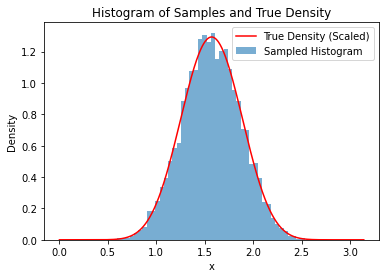

In [32]:
# Part 5

# Write your code to produce the plot here

# 生成样本并画图
def plot_samples_and_density(n_samples=10000):
    # 估计 C
    C = estimate_C()
    print(f"Estimated C: {C}")

    # 生成样本
    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, math.pi)
        u = np.random.uniform(0, C * 1)  # 候选分布 g(x) = 1
        if u <= target_pdf(x):
            samples.append(x)

    # 绘制直方图
    plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Histogram")

    # 绘制真实分布
    x_vals = np.linspace(0, math.pi, 1000)
    y_vals = [C * target_pdf(x) for x in x_vals]
    plt.plot(x_vals, y_vals, label="True Density (Scaled)", color="red")

    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Histogram of Samples and True Density")
    plt.legend()
    plt.show()

# 执行函数
plot_samples_and_density()


# Part 5

**Double click this cell and directly edit below to answer part 5**

### Begin explanation

Bla di bla

### End explanation

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float)) 
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

---
## Exam vB, PROBLEM 2
Maximum Points = 13


Consider the dataset `CORIS.csv` that you find in the data folder. The data set `CORIS.csv` contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (Idl), adiposity, family history (0 or 1), type A personality score (typea), obesity (body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).
In this dataset the `X` corresponds to the measurements. The `Y` is a 0-1 label where 1 represents CHD and 0 does not. The code to load the data is prepared and so is the train-test-validation split and the training of the model. The model is stored in `problem2_pipe` which is a Pipeline object as often used in composite models in sklearn, you will find in the cell corresponding to the different parts, some sample code how to use the model.

1. [3p] Use Hoeffdings inequality and compute the intervals for precision-recall etc. on the test set with 95% confidence.
2. [3p] You are interested in minimizing the average cost of your classifier. The hospital wants to use your model as a screening tool, that is, if it finds that someone is classified as CHD we interpret this as further investigation needs to take place, otherwise we do noting. After some deliberations you come to the conclusion that the following "costs" should be used (note, this is all imaginary at this point),
    * If someone has coronary heart disease but classified as not, we say it costs 300 **(this is the worst scenario)** 
    * If someone does not have coronary heart disease but classified as having it, we say it costs 10 **(this is less bad than the above issue)**
    * If someone has coronary heart disease but classified as having it, costs 0 **(We did the right thing, no cost)**
    * If someone does not have coronary heart disease but classified as not, costs 0 **(We did the right thing, no cost)**.

complete filling the function `cost` to compute the cost of a prediction model under a certain prediction threshold 
(recall our precision recall lecture and the `predict_proba` function from the LogisticRegression (code provided)). 

3. [4p] Now, we wish to select the threshold of our classifier that minimizes the cost, we do that by checking say 100 evenly spaced proposal thresholds between 0 and 1. Compute the optimal threshold using the testing data and calculate the cost at the chosen threshold using the testing data.
4. [3p] With your newly computed threshold value, compute the cost of putting this model in production by computing the cost using the validation data. Also provide a confidence interval of the cost using Hoeffdings inequality with a 99% confidence.

In [1]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv",skiprows=[1,2])

# Initial data split into features and target
problem2_X = CORISDataset[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']].values # Features
problem2_Y = CORISDataset['chd'].values # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(problem2_X,problem2_Y,train_size=0.6,random_state=42)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(X_tmp,Y_tmp,train_size=0.5,random_state=42)

# Show the shapes of the data
print(problem2_X_train.shape,problem2_Y_train.shape, problem2_X_test.shape, problem2_Y_test.shape, problem2_X_val.shape, problem2_Y_val.shape)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([('scaler',StandardScaler()),('logreg',LogisticRegression(random_state=42))])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train,problem2_Y_train)

(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

In [9]:
import numpy as np

def hoeffding_confidence_interval(value, n, confidence_level=0.95):
    """
    使用 Hoeffding 不等式计算置信区间。
    
    参数:
    - value: 精确率或召回率的经验值 (precision/recall)。
    - n: 样本数量。
    - confidence_level: 置信水平 (默认为 95%)。

    返回:
    - (lower_bound, upper_bound): 置信区间。
    """
    delta = 1 - confidence_level  # 映射置信水平到 delta
    epsilon = np.sqrt(np.log(2 / delta) / (2 * n))  # Hoeffding 界限
#     lower_bound = max(0, value - epsilon)  # 确保下界不小于 0
#     upper_bound = min(1, value + epsilon)  # 确保上界不大于 1
    lower_bound = value - epsilon # 确保下界不小于 0
    upper_bound = value + epsilon  # 确保上界不大于 1
    return lower_bound, upper_bound


In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

predictions_test = problem2_pipe.predict(problem2_X_test)

print("Model Accuracy:", accuracy_score(problem2_Y_test, predictions_test))
print("Overall F1-Score (Weighted):", f1_score(problem2_Y_test, predictions_test))
print("Classification Report:")
print(classification_report(problem2_Y_test, predictions_test))

Model Accuracy: 0.7391304347826086
Overall F1-Score (Weighted): 0.6129032258064516
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        58
           1       0.68      0.56      0.61        34

    accuracy                           0.74        92
   macro avg       0.72      0.70      0.71        92
weighted avg       0.73      0.74      0.73        92



In [11]:
# Part 1

# To make a prediction on a dataset `X` you can use the following code
# predictions = problem2_pipe.predict(X)
# That is, as with any other sklearn model, you can use the `predict` method

# Each precision and recall should be a tuple, for instance you can write
# precision0 = (0.9,0.95)
# the 0 or 1 in the variable name indicates the class

problem2_precision0 = 0.77
problem2_recall0 = 0.84
problem2_precision1 = 0.68
problem2_recall1 = 0.56

# 计算每个类别的精确率和召回率的置信区间
problem2_precision0_ci = hoeffding_confidence_interval(problem2_precision0, n=58)
problem2_precision1_ci = hoeffding_confidence_interval(problem2_precision1, n=34)
problem2_recall0_ci = hoeffding_confidence_interval(problem2_recall0, n=58)
problem2_recall1_ci = hoeffding_confidence_interval(problem2_recall1, n=34)

# 将结果存储为元组
problem2_precision0 = problem2_precision0_ci
problem2_precision1 = problem2_precision1_ci
problem2_recall0 = problem2_recall0_ci
problem2_recall1 = problem2_recall1_ci

print(f"精确率0的 95% 置信区间: {problem2_precision0}")
print(f"精确率1的 95% 置信区间: {problem2_precision1}")
print(f"召回率0的 95% 置信区间: {problem2_recall0}")
print(f"召回率1的 95% 置信区间: {problem2_recall1}")

# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)


精确率0的 95% 置信区间: (0.591672534506717, 0.9483274654932831)
精确率1的 95% 置信区间: (0.4470875115705871, 0.912912488429413)
召回率0的 95% 置信区间: (0.6616725345067169, 1.018327465493283)
召回率1的 95% 置信区间: (0.32708751157058713, 0.792912488429413)


In [12]:
# Part 2
from sklearn.metrics import confusion_matrix

def problem2_cost(model, threshold, X, Y):
    """
    Calculate the weighted cost of predictions based on a specific threshold.

    Parameters:
    - model: The trained classifier with a `predict_proba` method.
    - threshold: The prediction threshold to classify samples as positive.
    - X: Feature matrix.
    - Y: True labels.

    Returns:
    - cost: The average weighted cost per person.
    """
    # 1. 获取预测概率和基于门槛的分类结果
    pred_proba = model.predict_proba(X)[:, 1] # 获取每个样本的正类概率，例如[0.8, 0.3, 0.6]
    predictions = (pred_proba >= threshold).astype(int) # 例如[True, False, True]，再转化为0和1

    # 2. 获取混淆矩阵的值
    tn, fp, fn, tp = confusion_matrix(Y, predictions).ravel()

    # 3. 根据提供的权重定义成本
    cost_fn = 300  # False Negative cost
    cost_fp = 10   # False Positive cost

    # 4. 计算总成本
    total_cost = fn * cost_fn + fp * cost_fp
#     print("total_cost:", total_cost)

    # 5. 返回平均成本（总成本/总人数）
    avg_cost = total_cost / len(Y)
#     print("avg_cost:", avg_cost)
    return avg_cost

problem2_cost(model=problem2_pipe, threshold=0.5, X=problem2_X_test, Y=problem2_Y_test)

49.891304347826086

In [13]:
# Part 3
import numpy as np

def find_optimal_threshold(model, X, Y):
    """
    Find the optimal threshold for the classifier that minimizes the cost.

    Parameters:
    - model: The trained classifier with a `predict_proba` method.
    - X: Feature matrix.
    - Y: True labels.

    Returns:
    - optimal_threshold: The threshold that minimizes the cost.
    - min_cost: The minimum cost at the optimal threshold.
    """
    thresholds = np.linspace(0, 1, 100)  # 100 evenly spaced thresholds between 0 and 1
    costs = []

    # Iterate over all thresholds and calculate the cost
    for threshold in thresholds:
        cost = problem2_cost(model, threshold, X, Y)
        costs.append(cost)

    # Find the threshold with the minimum cost
    min_cost = min(costs)
    optimal_threshold = thresholds[np.argmin(costs)]
    return optimal_threshold, min_cost

# Find the optimal threshold and its associated cost on the test data
problem2_optimal_threshold, problem2_cost_at_optimal_threshold = find_optimal_threshold(problem2_pipe, problem2_X_test, problem2_Y_test)

print(f"Optimal Threshold: {problem2_optimal_threshold:.4f}")
print(f"Minimum Cost on Test Data: {problem2_cost_at_optimal_threshold:.2f}")


Optimal Threshold: 0.0707
Minimum Cost on Test Data: 5.22


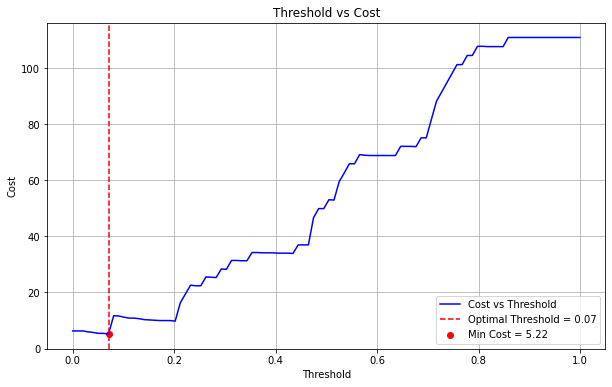

In [14]:
# 可视化
import matplotlib.pyplot as plt

def plot_threshold_vs_cost(model, X, Y):
    """
    Plot the relationship between thresholds and cost.

    Parameters:
    - model: The trained classifier with a `predict_proba` method.
    - X: Feature matrix.
    - Y: True labels.
    """
    thresholds = np.linspace(0, 1, 100)  # 100 evenly spaced thresholds between 0 and 1
    costs = []

    # Iterate over all thresholds and calculate the cost
    for threshold in thresholds:
        cost = problem2_cost(model, threshold, X, Y)
        costs.append(cost)

    # Find the optimal threshold and its associated cost
    optimal_threshold = thresholds[np.argmin(costs)]
    min_cost = min(costs)

    # Plot the thresholds vs cost
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, costs, label="Cost vs Threshold", color="blue")
    plt.axvline(x=optimal_threshold, color="red", linestyle="--", label=f"Optimal Threshold = {optimal_threshold:.2f}")
    plt.scatter(optimal_threshold, min_cost, color="red", label=f"Min Cost = {min_cost:.2f}")
    plt.xlabel("Threshold")
    plt.ylabel("Cost")
    plt.title("Threshold vs Cost")
    plt.legend()
    plt.grid()
    plt.show()

# Visualize threshold vs cost for the test data
plot_threshold_vs_cost(problem2_pipe, problem2_X_test, problem2_Y_test)


In [15]:
# Part 4

problem2_cost_at_optimal_threshold_validation = problem2_cost(
    model=problem2_pipe, threshold=problem2_optimal_threshold, X=problem2_X_val, Y=problem2_Y_val)

# Report the cost interval as a tuple cost_interval = (a,b)

problem2_cost_interval = hoeffding_confidence_interval(
    value=problem2_cost_at_optimal_threshold_validation, n=93, confidence_level=0.99)
print(f"最小成本 99% 置信区间: {problem2_cost_interval}")

# The code below will tell you if you filled in the intervals correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

最小成本 99% 置信区间: (5.530148022957088, 5.867701439408504)


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following two Markov chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>

**Answer each question for all chains:**
1. [2p] What is the transition matrix?
2. [1p] Is the Markov chain irreducible?
3. [4p] Is the Markov chain aperiodic? What is the period for each state? Hint: Recall our definition of period; Let $\mathbb{T}:=\{t \in \mathbb{N}: P^t(x,x) > 0\}$ and the greatest common divisor of $\mathbb{T}$ is the period.
4. [2p] Being in state $A$ at time $0$ what is the probability of being in state $B$ at time $5$ (after $5$ steps)
5. [4p] Define $T$ as the first time being in state $D$ starting in state $A$. That is, if $X_0,X_1,\ldots$ is the Markov chain then define for $X_0 = "A"$
$$
    T(\omega) = \inf_{t \in \mathbb{N}} \{t: X_t(\omega) = "D"\}
$$
where the infimum over the empty set is $\infty$. Calculate $\mathbb{P}(T = 1)$, $\mathbb{P}(T = 2)$, $\mathbb{P}(T = 3)$, $\mathbb{P}(T = 4)$, $\mathbb{P}(T = 5)$, $\mathbb{P}(T = \infty)$.

In [ ]:
import numpy as np
#------------------------TRANSITION MATRIX -------------------------------

problem3_A    = np.array([
    [0.0, 0.2, 0.0, 0.8],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0]
])


In [20]:
# PART 1
import numpy as np
#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([
    [0.0, 0.2, 0.0, 0.8],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0]
])
problem3_B    = np.array([
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.5, 0.0, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.5, 0.0, 0.0, 0.0, 0.0, 0.5]
])

In [68]:
#转移矩阵检查

Ps=[problem3_A,problem3_B]
# 验证转移矩阵的合法性
def is_valid_transition_matrix(P):
    # 1. 检查是否为方阵
    if P.shape[0] != P.shape[1]:
        return False, "The matrix is not square."

    # 2. 检查是否所有元素为非负数
    if not np.all(P >= 0):
        return False, "The matrix contains negative elements."

    # 3. 检查每行是否归一化为 1
    if not np.allclose(np.sum(P, axis=1), 1):
        return False, "The rows do not sum to 1."

    return True, "The matrix is a valid transition matrix."

# 验证转移矩阵
is_vlid_list=[]
for i, p in enumerate(Ps):  # 使用 enumerate 获取索引 i 和矩阵 p
    is_valid, message = is_valid_transition_matrix(p)
    is_vlid_list.append(is_valid)
    
    # 输出验证结果
    print(f"Markov chain and Digraph have been successfully constructed.")
    print(f"The size of transition matrix P_{i} is: {p.shape}")
    print(f"Whether it is a qualified transition matrix: {message}")


# 如果转移矩阵有效，构建有向图
G_list=[]
for i, p in enumerate(Ps):
    if is_vlid_list[i]:
        # 1. 构建有向图
        G = nx.DiGraph()
        
        # 添加边和权重
        for i in range(p.shape[0]):
            for j in range(p.shape[1]):
                if p[i, j] > 0:  # 仅添加非零权重的边
                    G.add_edge(i, j, weight=p[i, j])
        
        # 打印构建结果
        print("The directed graph (Digraph) has been successfully constructed.")
        print("Number of nodes:", G.number_of_nodes())
        print("Number of edges:", G.number_of_edges())
    
        # 可视化或分析
        print("Graph edges with weights:")
        for u, v, data in G.edges(data=True):
            print(f"Edge from {u} to {v}, weight = {data['weight']}")
        G_list.append(G)
    else:
        print("The transition matrix is not valid. Please check your input.")
        G_list.append(None)


Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_0 is: (4, 4)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
Markov chain and Digraph have been successfully constructed.
The size of transition matrix P_1 is: (6, 6)
Whether it is a qualified transition matrix: The matrix is a valid transition matrix.
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 4
Number of edges: 6
Graph edges with weights:
Edge from 0 to 1, weight = 0.2
Edge from 0 to 3, weight = 0.8
Edge from 1 to 2, weight = 1.0
Edge from 3 to 0, weight = 0.5
Edge from 3 to 2, weight = 0.5
Edge from 2 to 1, weight = 1.0
The directed graph (Digraph) has been successfully constructed.
Number of nodes: 6
Number of edges: 9
Graph edges with weights:
Edge from 0 to 1, weight = 1.0
Edge from 1 to 2, weight = 1.0
Edge from 2 to 1, weight = 0.5
Edge from 2 to 3, weight = 0.5
Edge from 3 to 2, weight = 0.5
Edge from 3 to 4, w

In [69]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False
import networkx as nx
G_A = nx.DiGraph(problem3_A)
G_B = nx.DiGraph(problem3_B)

problem3_A_irreducible = nx.is_strongly_connected(G_A)
problem3_B_irreducible = nx.is_strongly_connected(G_B)

print("Is the Markov chain irreducible?", problem3_A_irreducible, problem3_B_irreducible)

Is the Markov chain irreducible? False True


In [58]:
import numpy as np
import networkx as nx
from math import gcd
from functools import reduce

def calculate_periods(P):
    """
    计算每个状态的周期，并检查整个马尔可夫链的周期性。
    
    参数：
    - P (ndarray): 转移矩阵。

    返回：
    - periods (list): 每个状态的周期。
    """
    # 构建有向图
    G = nx.DiGraph(P)
    
    # 获取强连通分量
    scc = list(nx.strongly_connected_components(G))
    
    # 记录每个状态的周期
    state_periods = np.zeros(P.shape[0], dtype=int)
    
    # 遍历每个强连通分量
    for component in scc:
        component = list(component)
        submatrix = P[np.ix_(component, component)]  # 提取子矩阵
        
        # 找到分量内的所有状态周期
        component_period = []
        for i in range(len(component)):
            state = component[i]
            times = []
            
            # 检查从状态 state 回到自身的所有步数
            for t in range(1, 100):  # 假设最多计算 100 步
                P_t = np.linalg.matrix_power(submatrix, t)
                if P_t[i, i] > 0:  # 如果 t 步能回到自身
                    times.append(t)
            
            # 计算 gcd
            if times:
                component_period.append(reduce(gcd, times))
        
        # 如果 component_period 有值，设置所有状态的周期为分量周期
        if component_period:
            period = reduce(gcd, component_period)
            for state in component:
                state_periods[state] = period
    
    return state_periods

In [59]:
import numpy as np
from math import gcd
from numpy.linalg import matrix_power

def find_periods(P, max_steps=100, tol=1e-10):
    n = P.shape[0]
    periods = []
    
    for i in range(n):
        return_times = []
        for t in range(1, max_steps + 1):  # Test up to max_steps
            P_t = matrix_power(P, t)
            if P_t[i, i] > tol:  # Allow small tolerance for numerical errors
                return_times.append(t)
        
        if not return_times:  # If no return times found, state is transient
            periods.append(None)  # Mark as transient
            continue
        
        # Compute GCD of all return times
        state_period = return_times[0]
        for rt in return_times[1:]:
            state_period = gcd(state_period, rt)
        
        periods.append(state_period)
    
    return periods

In [60]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

# 3. 计算状态的周期
problem3_A_periods = find_periods(problem3_A, max_steps=100)# Increase max_steps if needed
is_aperiodic = all(p == 1 for p in problem3_A_periods if p is not None)
print("Periods for each state:", problem3_A_periods)
print("Is the Markov chain aperiodic?", is_aperiodic)

problem3_B_periods = find_periods(problem3_B, max_steps=100)# Increase max_steps if needed
is_aperiodic = all(p == 1 for p in problem3_B_periods if p is not None)
print("Periods for each state:", problem3_B_periods)
print("Is the Markov chain aperiodic?", is_aperiodic)

Periods for each state: [2, 2, 2, 2]
Is the Markov chain aperiodic? False
Periods for each state: [1, 1, 1, 1, 1, 1]
Is the Markov chain aperiodic? True


In [61]:
import numpy as np

def probability_at_time(P, initial_state, target_state, steps):
    """
    计算从初始状态 `initial_state` 出发，在经过 `steps` 次转移后，
    到达目标状态 `target_state` 的概率。
    
    参数:
    - P (ndarray): 马尔可夫链的转移矩阵。
    - initial_state (int): 初始状态的索引（从0开始）。
    - target_state (int): 目标状态的索引（从0开始）。
    - steps (int): 马尔可夫链的步数。
    
    返回:
    - float: 在 `steps` 步后到达目标状态的概率。
    """
    # 计算 P^steps
    P_steps = np.linalg.matrix_power(P, steps)
    # 返回目标状态的概率
    # 从结果矩阵 P^t中取出初始状态到目标状态的概率 P^t[initial_state,target_state]
    return P_steps[initial_state-1, target_state-1]

In [62]:
# PART 4

# Answer the following with the probability of being in state B at time 5 for the two problems
problem3_A_PB5 = probability_at_time(problem3_A, initial_state=1, target_state=2, steps=5)
print(f"概率：{problem3_A_PB5}")
problem3_B_PB5 = probability_at_time(problem3_B, initial_state=1, target_state=2, steps=5)
print(f"概率：{problem3_B_PB5}")

概率：0.872
概率：0.375


# 修正

In [43]:
def first_hit_probability_at_t(P, initial_state, target_state, t):
    """
    计算：从 1-based 索引的状态 `initial_state` 出发，
         在第 t 步【首次】到达状态 `target_state` (1-based) 的概率。

    使用“首次到达时间”递推 (First Step Analysis)。
    
    参数：
    - P: 转移矩阵 (n x n)，(Python内部 0-based)。
    - initial_state: 初始状态 (1-based 索引)。
    - target_state:  目标状态 (1-based 索引)。
    - t: 第 t 步 (int)。

    返回：
    - float: P(T = t)，即第 t 步首次到达的概率。
    """
    n = P.shape[0]
    if t < 1:
        return 0.0

    # 转成 0-based
    init_idx = initial_state - 1
    targ_idx = target_state - 1

    # 如果初始态就是目标态，则第0步就“到达”了
    if init_idx == targ_idx:
        # 通常定义“首次到达”第0步概率 = 1.0, 所以 t>=1 时就不会再是“首次”
        return 1.0 if t == 0 else 0.0

    # f[step, i] = 从 i 出发，第 step 步首次到达 targ_idx 的概率
    # 注意 i, targ_idx 都是 0-based
    f = np.zeros((t+1, n))

    # 初始化: step=1 的情况, f[1, i] = P(i->targ_idx)，对 i != targ_idx
    for i in range(n):
        if i != targ_idx:
            f[1, i] = P[i, targ_idx]

    # 递推: f[step+1, i] = sum_{j != targ_idx} P(i->j)*f[step,j]
    for step in range(1, t):
        for i in range(n):
            if i != targ_idx:
                f[step+1, i] = 0.0
                for j in range(n):
                    if j != targ_idx:
                        f[step+1, i] += P[i, j] * f[step, j]

    # 返回：从 init_idx 出发，第 t 步首次到达 targ_idx
    return f[t, init_idx]


def first_hit_probability(P, initial_state, target_state, T):
    """
    返回一个列表 [P(T=1), P(T=2), ..., P(T=T)] (1-based 索引)，
    表示从 `initial_state` (1-based) 出发，到 `target_state` (1-based)，
    在 第1步/第2步/.../第T步 首次到达 的概率。
    """
    probs = []
    for t in range(1, T+1):
        val = first_hit_probability_at_t(P, initial_state, target_state, t)
        probs.append(val)
    return probs


In [44]:
def probability_at_infinity(P, initial_state, target_state, T_max=100, tol=1e-12):
    """
    计算 P(T=∞) (1-based 索引)，即“从 `initial_state` 出发，永远不访问 `target_state` 的概率”。

    思路：
      - 累加 P(T=t) (t=1..T_max)，即到达事件的总概率(截断)。
      - 若总和 < 1-某阈值，则其余部分≈ P(T=∞).

    参数:
    - P: (n x n) 转移矩阵 (0-based 内部)
    - initial_state: 1-based
    - target_state: 1-based
    - T_max: 累加到多少步为止 (可根据规模增大)
    - tol: 判定是否近乎 1

    返回:
    - float: 近似的 P(T=∞)
    """
    # 累加 "首次到达" 概率到 T_max 步
    p_list = first_hit_probability(P, initial_state, target_state, T_max)
    total_reach = np.sum(p_list)
    # 若 total_reach < 1, 剩下就是 T=∞ 的概率
    p_infinity = max(0.0, 1.0 - total_reach)

    # 如果 total_reach 已经大于 1-tol，则视为几乎必达
    # 这里就简单返回 p_infinity；可以按需求改
    return p_infinity

In [47]:
# PART 5

# Answer the following probabilities for T=1,2,3,4,5 and infinity
# problem3_A_PT1 = first_hit_probability(problem3_A, initial_state=1, target_state=4, T=1)
# print(f"首次到达目标状态的概率: {problem3_A_PT1}")
# problem3_A_PT2 = first_hit_probability(problem3_A, initial_state=1, target_state=4, T=2)
# print(f"首次到达目标状态的概率: {problem3_A_PT2}")
# problem3_A_PT3 = first_hit_probability(problem3_A, initial_state=1, target_state=4, T=3)
# print(f"首次到达目标状态的概率: {problem3_A_PT3}")
# problem3_A_PT4 = first_hit_probability(problem3_A, initial_state=1, target_state=4, T=4)
# print(f"首次到达目标状态的概率: {problem3_A_PT4}")
problem3_A_PT5 = first_hit_probability(problem3_A, initial_state=1, target_state=4, T=5)
print(f"首次到达目标状态的概率: {problem3_A_PT5}")
problem3_A_PT_inf = probability_at_infinity(problem3_A, initial_state=1, target_state=4)
print(f"首次到达目标状态的概率: {problem3_A_PT_inf}")
print()
# problem3_B_PT1 = first_hit_probability(problem3_B, initial_state=1, target_state=4, T=1)
# print(f"首次到达目标状态的概率: {problem3_B_PT1}")
# problem3_B_PT2 = first_hit_probability(problem3_B, initial_state=1, target_state=4, T=2)
# print(f"首次到达目标状态的概率: {problem3_B_PT2}")
# problem3_B_PT3 = first_hit_probability(problem3_B, initial_state=1, target_state=4, T=3)
# print(f"首次到达目标状态的概率: {problem3_B_PT3}")
# problem3_B_PT4 = first_hit_probability(problem3_B, initial_state=1, target_state=4, T=4)
# print(f"首次到达目标状态的概率: {problem3_B_PT4}")    
problem3_B_PT5 = first_hit_probability(problem3_B, initial_state=1, target_state=4, T=5)
print(f"首次到达目标状态的概率: {problem3_B_PT5}")
problem3_B_PT_inf = probability_at_infinity(problem3_B, initial_state=1, target_state=4)
print(f"首次到达目标状态的概率: {problem3_B_PT_inf}")

首次到达目标状态的概率: [0.8, 0.0, 0.0, 0.0, 0.0]
首次到达目标状态的概率: 0.19999999999999996

首次到达目标状态的概率: [0.0, 0.0, 0.5, 0.0, 0.25]
首次到达目标状态的概率: 1.7763568394002505e-15
